<a href="https://colab.research.google.com/github/samugatu/AnaliseDeDesempenhoAcademico/blob/main/Clausterizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clausterizção

Primeiramente importar os dados e as principais bibliotecas que serão utilizadas, caso haja alguma outra que seja nescessária, será importada posteriormente.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

df=pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


Aqui, ja podemos ver quais são as variáveis dos nossos problemas. Então podemos começar a fazer aas análises:


# 1) Observação dos dados


Com base em **OPNIÃO**, vamos comentar cada uma das varáveis e tentar medir o seu impacto, como baixo, médio, alto e inexistentem. Tentando fazer uma breve explicação da classificação.

**Idade**

impacto: baixo

Acredito que exista alguma correlação de tal modo que pessoas mais velhas tendem a ter melhor performance academica, pois são mais velhas e experientes e provavelmente mais responsaveis. Por outro lado, essas mesmas pessoas mais velhas podem ter outras responsabilidades que oucupem o seu tempo, por isso acredito que o impacto seja baixo, pois em uma amostragem geral, vai ter pessoas mais novas mais dedicadas e vai ter pessoas mais velhas mais relaxadas por exemplo.

**Gênero**

Impacto: Zero

Não precisaria nem de explicação, mas não existem motivos para que um gênero tenha maior ou menor desemepnho que outro. Única coisa que eu acho que poderia impactar é a maternidade, mas não temos estes dados, então acredito que o impacto será **zero**.

**Horas de estudos por dia**

Impacto: Alto

Esta é bem intuitiva, pessoas que estudam mais, vai ter um desempenho melhor. Uma coisa que eu acho que pode acontecer é que quem estuda **muito mais** que a média pode ter um desempenho pior do que aquele que estuda **mais** que a média.

**Horas de mídia social**

Impacto: médio

Aquí é delicado, pois na lógica fica muito tempo em redes sociais tendem a ter pior desempenho. Porém o maior problema é deixar de estudar para mexer nas redes sociais. Aí o que pode ser interessante é criar uma variável entre horas de estudo, e mídia social pra ver como a pessoa usa as horas do seu dia e como isso impacta no seu desempenh0.

**Horas de Netflix**

Impacto: Médio

Mesma idéia das redes sociais, porém um pouco menos impactante. Pois acredito que pessoas com um bom desempenho acabam escolhendo ver um filme de qualidade no seu tempo livre do que ficar mexendo nas redes sociais. Mas com a mesma ideia anteriormente, o problema é a pessoa deixar de estudar para ver Netflix.

**Trabalho meio período**

Impacto: Alto

Acredito aqui que essa deve ser um dos maiores impactos, pessoas que trabalham, mesmo que meio período ou estágio, provavelmente tem um desempenho pior.

**Presença**

Impacto: Médio

Acredito que exista um impacto relevante, mas não nescessariamente alto. Por puro **achismo**.

**Horas de sono**

Impacto: Alto

Qualidade de sono é muito importante para a mente e acredito que veremos isto com dados neste trabalho. Acredito que tenh um impacto alto e que não siga uma regressão de quantos mais horas de sono melhor, mas sim que dorme de 7 a 8 horas téra um bom desempenho.

**Alimentação**

Impacto: baixo

Particularmente eu acredito que tenha alguma relação mas não consigo ver muito motivos que seja determinante para uma bom desempenho.

**Exercícios Físicos**

Impacto: baixo

Acredito que tenha alguma correlação, porém baixa. Pode ser bom para mente, mas acaba oucupando horas de estudo também.

**Nível de educação dos pais**

Impacto: baixo

Aquí acredito que possa ter um impacto bem baixo pois deve ser algo mais cultural e não algo que vá refletir muito na exam score.

**Qualidade de internet**

Impacto: baixo

Essa aqui eu acho bem **interessante**, particulamente algo que me deixa estressado é internet lenta e isto atrapalha muito meus estudos, principalmente quando estou pela UnB. Mas enfim, deve haver alguma correlação mas nao causalidade, uma coisa que poderemos ver é que a maioria das pessoas com bom desemepenho terá uma qualidade de internet boa.

**Saúde Mental**

Impacto: Médio

Saúde mental é importante para qualquer coisa, assim como qualidade de sono pode influenciar tambem. Mas não acredito que seja algo que imapcatria muito no desempenho poís, consigo pensar em varia pessoas gênias que tem prblemans de saúde mental.

**Participação extra curricular**

Impacto: Baixo

Aqui eu acredito que tenha uma correlação, mas não uma causalidade.

# 2) Análise Exploratória dos Dados

Vamos verficar como estão os nossos dados:

In [109]:
data_info = df.info()
missing_values = df.isnull().sum()
stats=df.describe()
print(data_info)
print(missing_values)
print(stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

Ok, nossos dados estão inteiros, sem valores faltantes, então podemos fazer a análise sem problemas.


Começando pela mastrizcorrelação para tirar alguns issues

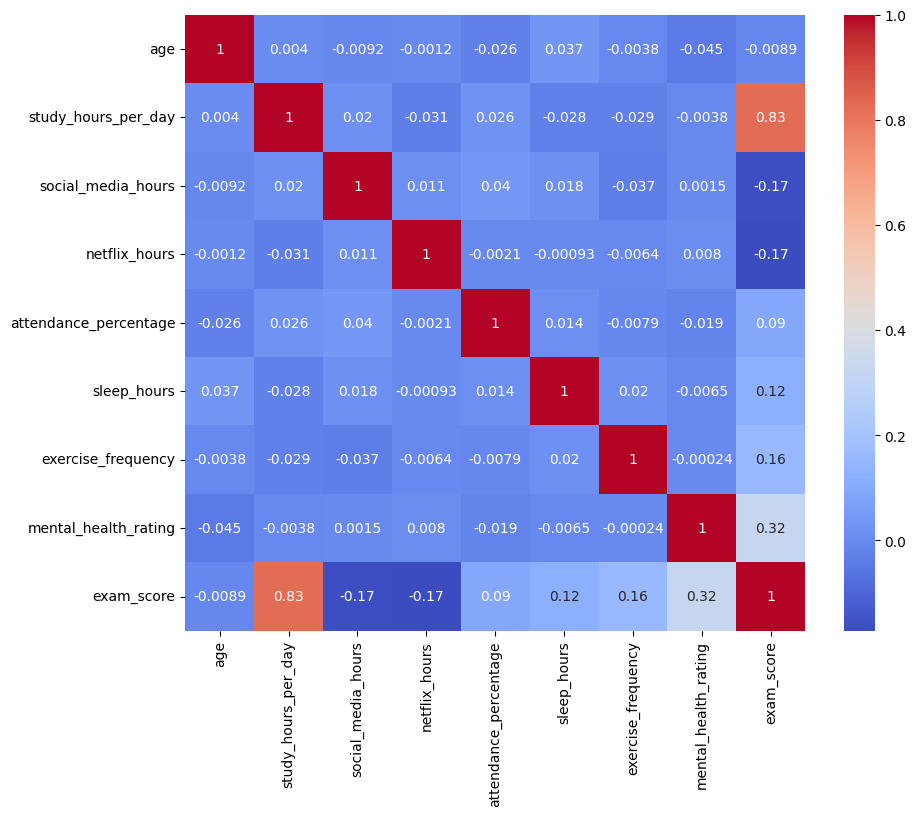

In [110]:
unique_values ={col:df[col].unique() for col in df.select_dtypes(include=['object']).columns}

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Vamos olhar a utima coluna, para vizualisar as correlaçoes com o desemepenho da prova.

Horas de estudos por dia tem uma correlação positiva de 0.83, ou seja, muito forte e como esperado.

Saúde mental teve ums score relativamente alto.

Podemos ver também que idade praticamente não tem correlação.

E social media e netflix tem uma correlação igual e negativa.

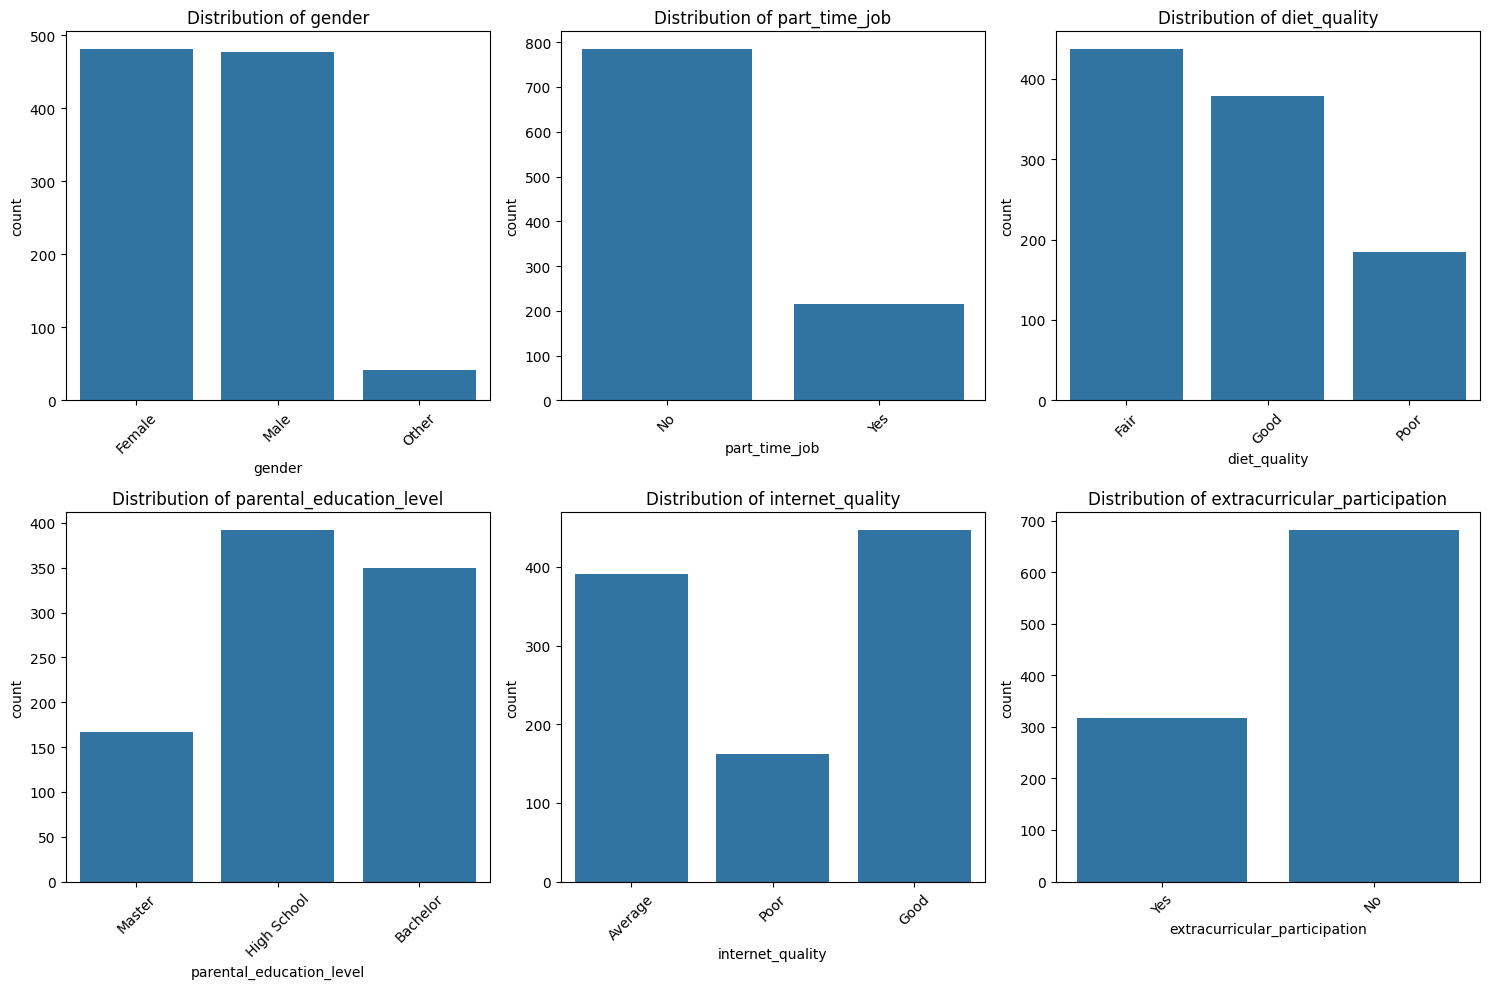

In [111]:
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level',
                    'internet_quality', 'extracurricular_participation']

plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Aqui é so para ter noção como estão distribuidos os nosso dados categóricos. Não ha muita analise a se fazer, mas podermos ver que a maior discrepancia é em relação ao part_time_job e extra_curricular_participation.


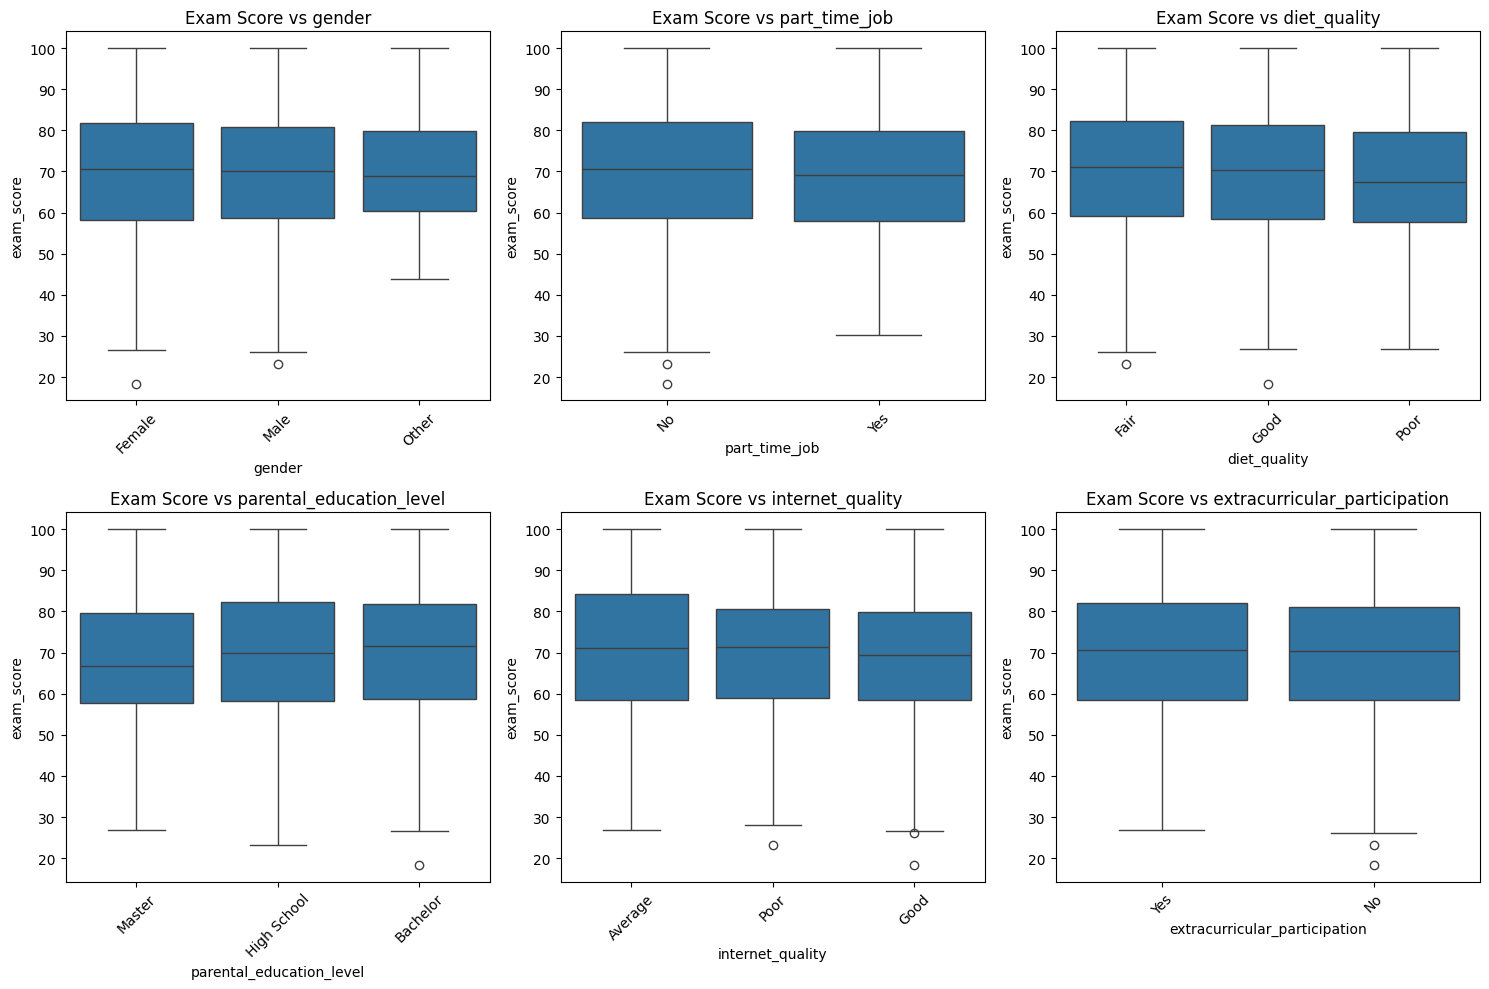

In [112]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col, y='exam_score')
    plt.title(f"Exam Score vs {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Com Boxplot da pra ter uma boa noção de como cada categoria tem seu resultado final do exam_score, porem vamos ser mais precisos, comparando a média.

In [113]:
gender_avg = df.groupby('gender')['exam_score'].mean()
part_time_job_avg = df.groupby('part_time_job')['exam_score'].mean()
diet_avg = df.groupby('diet_quality')['exam_score'].mean()
parental_education_avg = df.groupby('parental_education_level')['exam_score'].mean()
internet_quality_avg = df.groupby('internet_quality')['exam_score'].mean()
extracurricular_avg = df.groupby('extracurricular_participation')['exam_score'].mean()

print("Média das notas de exame por **Gênero**:")
for gender, avg in gender_avg.items():
    print(f"- {gender}: {avg:.2f}")
print("\n")

print("Média das notas de exame por **Emprego de Meio Período**:")
for job_status, avg in part_time_job_avg.items():
    print(f"- {job_status}: {avg:.2f}")
print("\n")

print("Média das notas de exame por **Qualidade da Dieta**:")
for diet_quality, avg in diet_avg.items():
    print(f"- {diet_quality}: {avg:.2f}")
print("\n")

print("Média das notas de exame por **Nível de Escolaridade dos Pais**:")
for education_level, avg in parental_education_avg.items():
    print(f"- {education_level}: {avg:.2f}")
print("\n")

print("Média das notas de exame por **Qualidade da Internet**:")
for internet_quality, avg in internet_quality_avg.items():
    print(f"- {internet_quality}: {avg:.2f}")
print("\n")

print("Média das notas de exame por **Participação em Atividades Extracurriculares**:")
for participation, avg in extracurricular_avg.items():
    print(f"- {participation}: {avg:.2f}")


Média das notas de exame por **Gênero**:
- Female: 69.74
- Male: 69.37
- Other: 70.65


Média das notas de exame por **Emprego de Meio Período**:
- No: 69.84
- Yes: 68.74


Média das notas de exame por **Qualidade da Dieta**:
- Fair: 70.43
- Good: 69.37
- Poor: 68.13


Média das notas de exame por **Nível de Escolaridade dos Pais**:
- Bachelor: 70.27
- High School: 69.55
- Master: 68.09


Média das notas de exame por **Qualidade da Internet**:
- Average: 70.64
- Good: 68.65
- Poor: 69.72


Média das notas de exame por **Participação em Atividades Extracurriculares**:
- No: 69.59
- Yes: 69.62


A diferença da média entre os gêneros é muito baixa menos de 2 pontos.

A diferença da média entre os empregos de meio periodo ja é consideravel com uma diferença de 6 pontos praticamente.

A diferença entre as média de qualidade de dieta é bem consideravel. Entre boa e ruim, tem uma diferença de aproximandamente 8 pontos.

O nível de escolaridade dos pais tambem deu uma diferença bem alta. Então entre pais com PhD e somente o HighSchool teve uma diferença de 10 pontos praticamente.

Qualidade de internet teve uma diferença baixa considerando 4 categorias. Entre ruim e excelente uma diferença de 7 pontos, mas a média da internet excellent foi de 66.4 então internet n quer dizer muita coisa.

Participação em atividades Extracurriculares teve uma diferença de 4 pontos, ou seja, tambem baixa.


Agora em uma matriz de correlção com todas as variaveis podemos ver o seguinte:

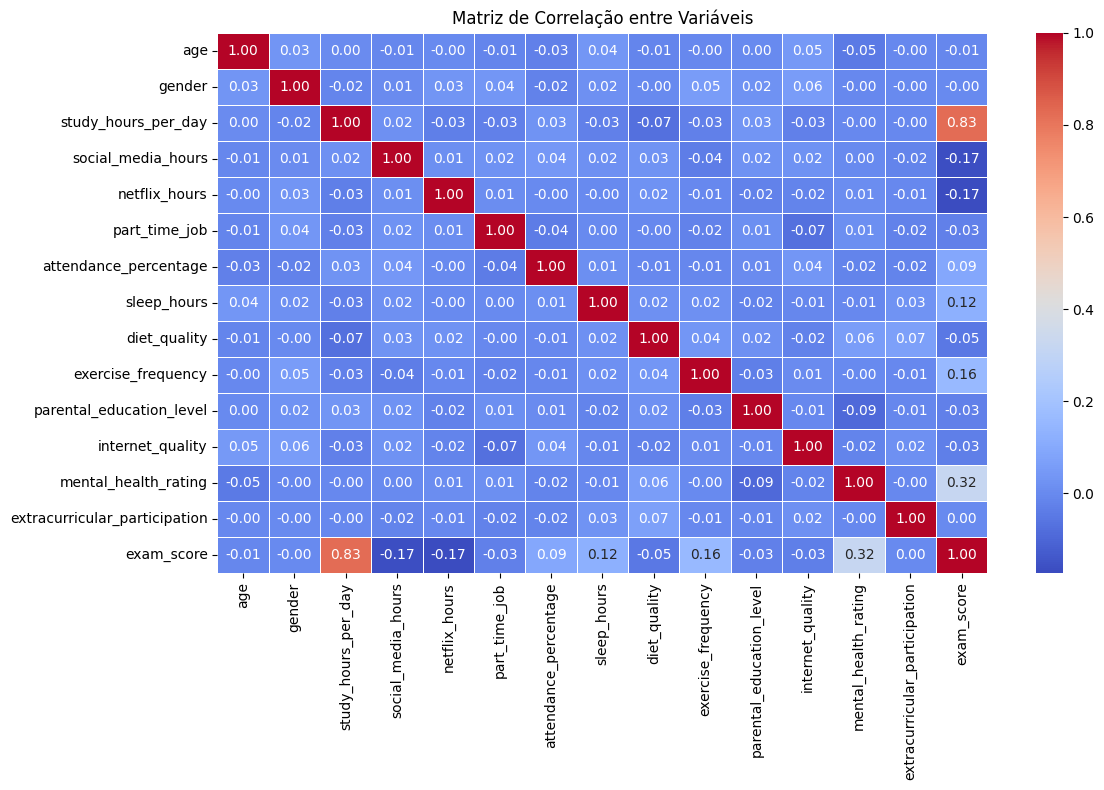

In [114]:
from sklearn.preprocessing import LabelEncoder


categorical_columns = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level',
                       'internet_quality', 'extracurricular_participation']

label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df_numeric = df.drop(columns=['student_id'])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlação entre Variáveis")
plt.tight_layout()
plt.show()

Então concluindo na EDA, horas de estudos por dia é a varaivel mais importante, pois tem uma correlação bem alta e positiva. Saude mental tambem tem um impacto alto. E podemos colocar como médio, frequencia de exercicios, horas de seono, horas de netflix e social media. O restante pode-se dizer que tem um impacto baixo ou inexistente.

# 3) Comparação entre hipótese e análise:

Então como eu classifique as variáveis com base no impacto como alto, médio, baixo e inxistente. Vamos comparar com os dados da matriz de correlçao considerando o **módulo **

**Alto** : Entre 0.3 e 1.0

**Médio**: Entre 0.1 e 0.3

**Baixo**: Entre 0 e 0.1

**Inexistente**: Igual a 0.

In [115]:

#### Feito com o chatgpt para tentar deixar a tabela mais bonita #####
import pandas as pd
from IPython.display import display

# Criar a tabela com os dados
data = {
    "Categoria": [
        "Idade", "Gênero", "Horas de Estudo", "Social Mídia", "Netflix",
        "Emprego de Meio Período (Job)", "Presença (Attendance)", "Horas de Sono", "Dieta",
        "Exercícios", "Nível de Escolaridade dos Pais", "Qualidade da Internet",
        "Saúde Mental", "Atividades Extracurriculares"
    ],
    "Análise dos Dados": [
        "Baixo impacto", "Sem diferença significativa", "Alto impacto", "Médio impacto negativo",
        "Médio impacto negativo", "Alto impacto negativo", "Médio impacto positivo", "Médio impacto positivo",
        "Baixo impacto negativo", "Baixo impacto positivo", "Médio impacto positivo", "Baixo impacto positivo",
        "Médio impacto positivo", "Baixo impacto positivo"
    ],
    "Hipótese": [
        "Baixo impacto", "Sem diferença", "Alto impacto", "Médio impacto", "Médio impacto",
        "Baixo impacto", "Baixo impacto", "Alto impacto", "Baixo impacto", "Médio impacto",
        "Baixo impacto", "Baixo impacto", "Alto impacto", "Baixo impacto"
    ],
    "Resultado": [
        "Acertei", "Acertei", "Acertei", "Acertei", "Acertei",
        "Errei", "Errei", "Acertei", "Acertei", "Acertei",
        "Errei", "Acertei", "Acertei", "Acertei"
    ]
}

# Criar DataFrame
df_comparacao = pd.DataFrame(data)

# Exibir a tabela
display(df_comparacao)


,Categoria,Análise dos Dados,Hipótese,Resultado
0,Idade,Baixo impacto,Baixo impacto,Acertei
1,Gênero,Sem diferença significativa,Sem diferença,Acertei
2,Horas de Estudo,Alto impacto,Alto impacto,Acertei
3,Social Mídia,Médio impacto negativo,Médio impacto,Acertei
4,Netflix,Médio impacto negativo,Médio impacto,Acertei
5,Emprego de Meio Período (Job),Alto impacto negativo,Baixo impacto,Errei
6,Presença (Attendance),Médio impacto positivo,Baixo impacto,Errei
7,Horas de Sono,Médio impacto positivo,Alto impacto,Acertei
8,Dieta,Baixo impacto negativo,Baixo impacto,Acertei
9,Exercícios,Baixo impacto positivo,Médio impacto,Acertei


As mairoes diferenças foi no nivel de escolaridade dos pais onde eu 'chutei' baixo e foi médio. E a diferença das medias foi alta

O emprego de meio periodo eu 'chutei' que seria uma das maiores e pra minha surpresa foi baixo, até a diferença da média foi baixa.(pra mim ainda não faz sentido rsrs)

# 4) K-means do zero

Para fazer isso vamos seguir os seguintes passos:

1-Inicializar centróides de forma alatória;

2- Atribuir cada ponto o centóide mais perto;

3- Atualizar os centróides com base na média de cada um;

4- Reptir até o número de iterações for atingido.

Função para inciar os centróides de forma aleatória

In [116]:
import numpy as np

def iniciar_centroid(X,k):
  np.random.seed(42)
  random_indices = np.random.choice(X.shape[0], size=k,replace = False)
  centroid = X[random_indices]
  return centroid

Agora a função para calcular as ditâncias entre os pontos e o centróide

In [117]:
def distancia(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

Função para atribuir o centróide mais próximo:

In [118]:
def definir_clusters(X, centroids):
    clusters = []
    for i in range(X.shape[0]):
        distances = [distancia(X[i], centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

Função para atualizar o centróide:

In [119]:
def atualizar_centroids(X, clusters, k):
    novo_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points_in_cluster = X[clusters == i]
        novo_centroids[i] = points_in_cluster.mean(axis=0)
    return novo_centroids


Agora a função para calcular o K-means

In [120]:
def kmeans(X, k, max_iters=100):
    centroids = iniciar_centroid(X, k)
    for _ in range(max_iters):
        clusters = definir_clusters(X, centroids)  # Atribuir pontos ao centróide mais próximo
        novo_centroids = atualizar_centroids(X, clusters, k)  # Atualizar centróides

        # Verificar se os centróides mudaram
        if np.all(centroids == novo_centroids):
            break
        centroids = novo_centroids  # Atualizar centróides para a próxima iteração

    return centroids, clusters


Agora vamos aplicar no nosso dataset:

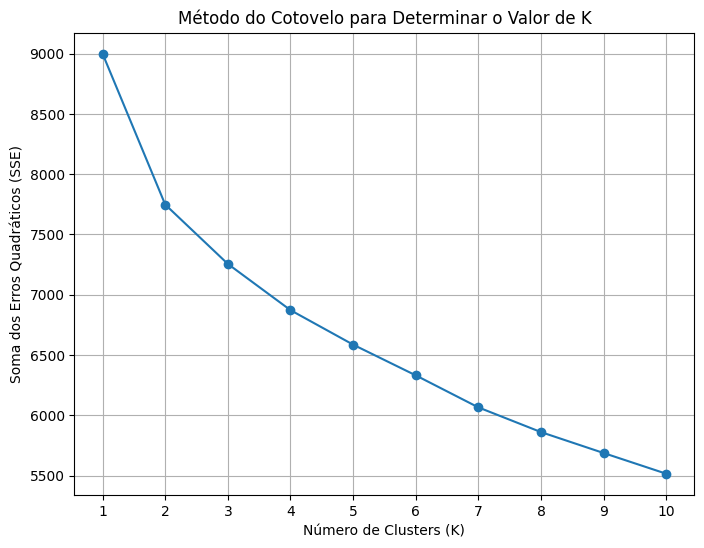

In [121]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
                     'attendance_percentage', 'sleep_hours', 'exercise_frequency',
                     'mental_health_rating', 'exam_score']
escalar = StandardScaler()
df[numerical_columns] = escalar.fit_transform(df[numerical_columns])

sse = []
K_range = range(1, 11)
for k in range(1, 11):
    centroids, clusters = kmeans(df[numerical_columns].values, k)
    sse.append(np.sum([distancia(df[numerical_columns].values[i], centroids[clusters[i]])**2 for i in range(len(df))]))

plt.figure(figsize=(8, 6))
plt.plot(K_range, sse, marker='o')
plt.title("Método do Cotovelo para Determinar o Valor de K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Soma dos Erros Quadráticos (SSE)")
plt.xticks(K_range)
plt.grid(True)
plt.show()


Aplicando k = 2 após ver o grafico

In [122]:
k = 2
centroids, clusters = kmeans(df[numerical_columns].values, k)


Vamos vizualizar os resultados:

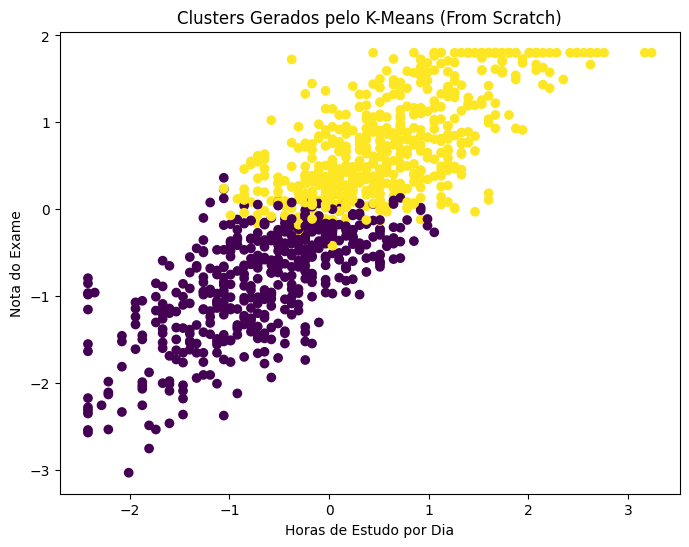

In [123]:
plt.figure(figsize=(8, 6))
plt.scatter(df['study_hours_per_day'], df['exam_score'], c=clusters, cmap='viridis')
plt.title("Clusters Gerados pelo K-Means (From Scratch)")
plt.xlabel("Horas de Estudo por Dia")
plt.ylabel("Nota do Exame")
plt.show()


# 5) Justificativa do valor de K

O valor de K representa o número de cluster que o algoritimo k-means deve identificar no nosso conjunto de dados. Existem algumas abordagens que pode determinar o valor de k ideal.

Nesse caso utilizei a regra do cutuvelo. A idéia e calcular a soma das distancias ao quadrado entre os ponstos dos dados e o centróide, vulgo sse, ou sima dos erros quadratico, para diferentes valores de K e identificar no grafico onde a taxa de diminuição do sse começa a diminuir.

No nosso caso, pode-se notar a maior taxa de 'desaceleração' no k= 2 e posterior a isso permanece desacerelando de forma contínua depois do 4.

Então nossos possiveis valores de k possiveis é 2, 3 e 4.

Como é calculado o SSE?


\begin{equation}
SSE(K) = \sum_{i=1}^{N} \sum_{k=1}^{K} r_{ik} \cdot ||x_i - \mu_k||^2
\end{equation}

Onde:

- \( N \): Número total de pontos de dados.
- \( K \): Número total de clusters.
- \( r_{ik} \): Variável indicadora que vale 1 se o ponto \( x_i \) pertence ao cluster \( k \), e 0 caso contrário.
- \( x_i \): Ponto de dado \( i \).
- \( \mu_k \): Centrôide do cluster \( k \).
- \( ||x_i - \mu_k||^2 \): Distância euclidiana ao quadrado entre o ponto \( x_i \) e o centróide \( \mu_k \).


Vamos comparar os gráficos com k=2,k=3 e k=4:

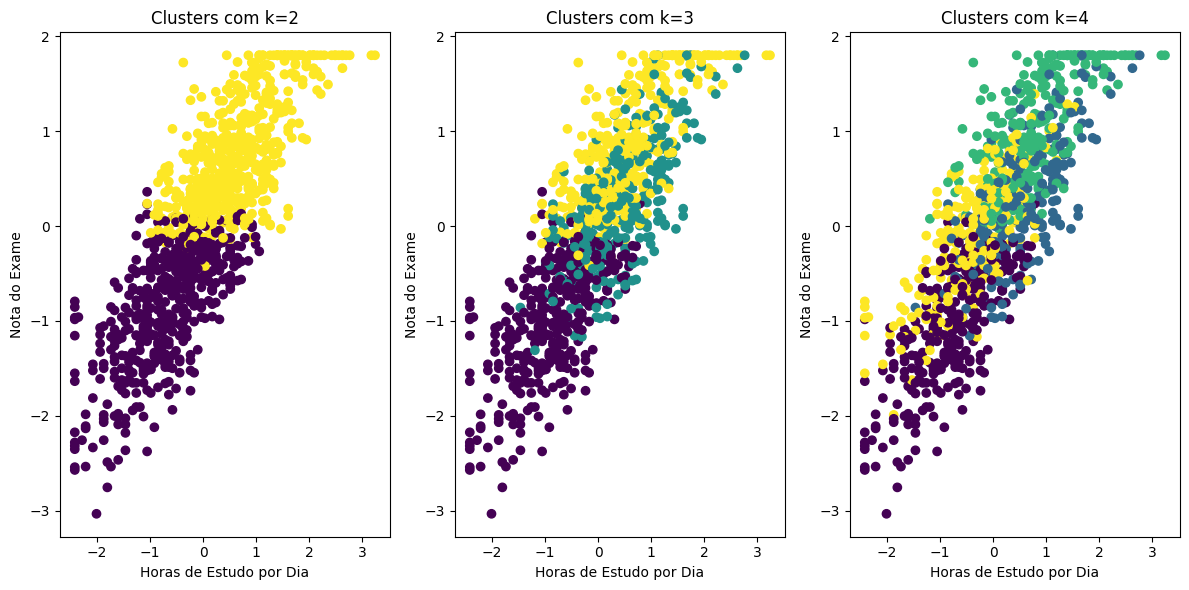

In [125]:
kmeans_2 = kmeans(df[numerical_columns].values, k=2)
df['cluster_2'] = kmeans_2[1]

kmeans_3 = kmeans(df[numerical_columns].values, k=3)
df['cluster_3'] = kmeans_3[1]

kmeans_4 = kmeans(df[numerical_columns].values, k=4)
df['cluster_4'] = kmeans_4[1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(df['study_hours_per_day'], df['exam_score'], c=df['cluster_2'], cmap='viridis')
plt.title("Clusters com k=2")
plt.xlabel("Horas de Estudo por Dia")
plt.ylabel("Nota do Exame")

plt.subplot(1, 3, 2)
plt.scatter(df['study_hours_per_day'], df['exam_score'], c=df['cluster_3'], cmap='viridis')
plt.title("Clusters com k=3")
plt.xlabel("Horas de Estudo por Dia")
plt.ylabel("Nota do Exame")

plt.subplot(1,3,3)
plt.scatter(df['study_hours_per_day'], df['exam_score'], c=df['cluster_4'], cmap='viridis')
plt.title("Clusters com k=4")
plt.xlabel("Horas de Estudo por Dia")
plt.ylabel("Nota do Exame")


plt.tight_layout()
plt.show()

analise:

Primeiramente podemos notar claramente a correlação entre a horas de estudos com as notas. Com uma regressão linear possitiva representada pela inclinação do nosso grafico.

**k=2**

Siginifica que temos dois grupos, um que estuda mais e outro menos, podemos ver que não existe uma separaçao no grupo, ou seja=, não existe uma hora mímina para voce ter certo desempenho ou algo que separe os grupos. Mas é isso, podemos resumir que os grupo que mais estuda tem notas melhores e o grupo que estuda menos tem notas piores, ali no meio não fica bem separado, pois existem outros fatores que influenciam na nota como ja vimos aqui.

**k=3**

Podemos pensar como 3 grupos, estudam muito, estudam mediano, estudam pouco.
Este, particulamente eu acho o **melhor** pois da pre ver claramente o grupo que estuda pouco mais segregado do restante. Enquanto os outros dois, estudo mediano e estuda muito, mais misturado. Isso é bem explicavel, pois vamos ter os seguinte s casos:

os que estudam muito e não conseguiram tirar boas noites por muitos motivos, como desatenção em alguma questão, pode ter caido alguma questão de algo especifico que ele acabou não estudando, algum dia ruim etc

e tem os que estudaram mediano e mesmo assim consegui notas boas, as vezes maior do que quem estudou muito, as vezes pois ele tem uma qualidade de estudo melhor, pode ter dado 'sorte' de cair somente coisas que ele ja sabia, ou ele ja tinha uma base boa e precisou estudar menos.

**k=4**

Esse aqui é interessante eu dividiria da seguinte forma:

1-estuda pouco

2-estuda medio, mas estuda mal

3-estuda medio, mas estuda bem

4-estuda muito

Segue a mesma ideia do k=3 so que divide o pessoal que estuda media, ou seja separam aqueles que estudam medio, mas estudam com qualidade e acabam tirando notas superiores ou semelhantes aos ques estudaram muito.




Foi escolhido a variavel horas de estudo, pois apresentou uma correlação muito alta e daria pra tirar alguns insights de melhor qualidade.

# 6) Revisão das hipóteses


Vamos fazer o gráfico para todas as variaveis e disctuir os resultados:

*Infelizmente ive dificuldades para fazer o código que gerasse o gráfico para todas as colunas, não sei ao certo o que estava dando errado, tentei arrumar com ajuda do chatgpt e não foi do jeito que eu queria. Uma pena pois estava bem animado com este trabalho*

Agora para as colunas categoricas:

*Pelo mesmo motivo anterior, não foi possivel fazer esta parte*